<a href="https://colab.research.google.com/github/VivekRedD1999/Computational-Methods/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 11/03/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=64bdaa174435039c49549a71fb502dcd20402208a50c586ba759082e44937003
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("data.csv")

#Cleaning the data
import re

def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

df["Text"] = df["Text"].apply(cleantext)

# Convert to list
data = df.Text.values.tolist()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [ ]:
b = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
t = gensim.models.Phrases(b[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bmod = gensim.models.phrases.Phraser(b)
tmod = gensim.models.phrases.Phraser(t)

# See trigram example
print(tmod[bmod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['optimistic', 'about', 'our', 'ability', 'to', 'prevent', 'the', 'next', 'pandemic', 'we', 'have', 'learned', 'so', 'much', 'from', 'covid', 'and', 'the', 'innovations', 'have', 'been', 'tremendous']


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bmod[doc] for doc in texts]

def make_trigrams(texts):
    return [tmod[bmod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['optimistic', 'ability', 'prevent', 'next', 'pandemic', 'learn', 'much', 'covid', 'innovation', 'tremendous']]


In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['foundations', 'of', 'statistical', 'natural', 'language', 'processing']


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['foundation', 'statistical', 'natural', 'language', 'processing']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('foundation', 1),
  ('language', 1),
  ('natural', 1),
  ('processing', 1),
  ('statistical', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.157*"natural" + 0.157*"language" + 0.157*"processing" + '
  '0.044*"application" + 0.044*"structure" + 0.044*"confidence" + 0.044*"nltk" '
  '+ 0.044*"ant" + 0.044*"use" + 0.044*"learn"'),
 (1,
  '0.080*"web" + 0.080*"model" + 0.080*"base" + 0.080*"structure" + '
  '0.074*"complexity" + 0.067*"natural" + 0.066*"language" + '
  '0.066*"processing" + 0.004*"multitask" + 0.004*"neural"'),
 (2,
  '0.167*"issue" + 0.086*"software" + 0.086*"current" + 0.086*"engineer" + '
  '0.046*"natural" + 0.045*"language" + 0.045*"processing" + 0.004*"multitask" '
  '+ 0.004*"coverage" + 0.004*"process"'),
 (3,
  '0.274*"processing" + 0.274*"language" + 0.269*"natural" + 0.016*"learn" + '
  '0.011*"logic" + 0.010*"use" + 0.010*"tool" + 0.010*"recognition" + '
  '0.010*"plan" + 0.006*"complexity"'),
 (4,
  '0.189*"language" + 0.189*"processing" + 0.189*"natural" + 0.063*"retrieval" '
  '+ 0.032*"machine" + 0.032*"learn" + 0.016*"statistic" + 0.016*"text" + '
  '0.016*"box" + 0.016*"context"'),
 

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.1207794684630175

Coherence Score:  0.614162171822503


In [ ]:
!wget "http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip"
!unzip "/content/mallet-2.0.8.zip"

--2022-04-04 03:47:19--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-04 03:47:20--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  7.40MB/s    in 2.1s    

2022-04-04 03:47:22 (7.40 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  /content/mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: 

In [ ]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/content/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(17,
  [('processing', 0.7142857142857143),
   ('relate', 0.047619047619047616),
   ('education', 0.047619047619047616),
   ('requirement', 0.047619047619047616),
   ('confidence', 0.047619047619047616),
   ('teaching', 0.047619047619047616),
   ('transformation', 0.047619047619047616),
   ('programming', 0.0),
   ('multitask', 0.0),
   ('broad', 0.0)]),
 (11,
  [('processing', 0.5238095238095238),
   ('natural', 0.09523809523809523),
   ('ontology', 0.047619047619047616),
   ('broad', 0.047619047619047616),
   ('biomedical', 0.047619047619047616),
   ('evaluate', 0.047619047619047616),
   ('parallelism', 0.047619047619047616),
   ('issue', 0.047619047619047616),
   ('overview', 0.047619047619047616),
   ('model', 0.047619047619047616)]),
 (19,
  [('natural', 0.7272727272727273),
   ('tool', 0.13636363636363635),
   ('adaptive', 0.045454545454545456),
   ('visual', 0.045454545454545456),
   ('analysis', 0.045454545454545456),
   ('coverage', 0.0),
   ('multitask', 0.0),
   ('thoughttr

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

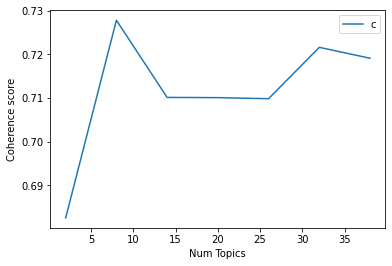

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6825
Num Topics = 8  has Coherence Value of 0.7278
Num Topics = 14  has Coherence Value of 0.7102
Num Topics = 20  has Coherence Value of 0.7101
Num Topics = 26  has Coherence Value of 0.7099
Num Topics = 32  has Coherence Value of 0.7216
Num Topics = 38  has Coherence Value of 0.7191


In [ ]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.583*"natural" + 0.125*"tool" + 0.042*"education" + 0.042*"study" + '
  '0.042*"network" + 0.042*"lexicon" + 0.042*"software" + 0.042*"frame" + '
  '0.042*"apply" + 0.000*"programming"'),
 (1,
  '0.633*"language" + 0.067*"approach" + 0.033*"issue" + 0.033*"robust" + '
  '0.033*"evaluation" + 0.033*"triumph" + 0.033*"section" + 0.033*"integrate" '
  '+ 0.033*"compute" + 0.033*"box"'),
 (2,
  '0.562*"language" + 0.062*"robotic" + 0.062*"overview" + 0.062*"drive" + '
  '0.062*"principle" + 0.062*"assist" + 0.062*"induction" + 0.062*"ambiguity" '
  '+ 0.000*"programming" + 0.000*"multitask"'),
 (3,
  '0.708*"processing" + 0.042*"computer" + 0.042*"software" + '
  '0.042*"parallelism" + 0.042*"commercial" + 0.042*"tribulation" + '
  '0.042*"coverage" + 0.042*"entropy" + 0.000*"apply" + 0.000*"multitask"'),
 (4,
  '0.526*"language" + 0.105*"neural" + 0.105*"processing" + 0.105*"machine" + '
  '0.053*"model" + 0.053*"analysis" + 0.053*"base" + 0.000*"context" + '
  '0.000*"programmin

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.0677,"natural, foundation, modeling, visual, text, p...",Foundations of statistical natural language p...
1,1,3.0,0.0665,"processing, computer, software, parallelism, c...",A Maximum Entropy approach to Natural Languag...
2,2,9.0,0.0535,"language, infrastructure, context, description...",Natural Language Processing
3,3,12.0,0.0556,"language, statistical, statistic, deep, large,...",Linguistics and Natural Language Processing
4,4,7.0,0.0577,"processing, workbench, base, lyric, probabilis...",Natural Language Processing
5,5,5.0,0.0669,"natural, logic, scratch, adaptive, web, proces...",Natural language processing (almost) from scr...
6,6,4.0,0.0535,"language, neural, processing, machine, model, ...",Natural language processing
7,7,2.0,0.0669,"language, robotic, overview, drive, principle,...",Natural Language Processing/Robotics
8,8,13.0,0.0556,"language, retrieval, processing, kernelized, a...",Tutorial on Natural Language Processing
9,9,2.0,0.0648,"language, robotic, overview, drive, principle,...",Ambiguities in Natural Language Processing


In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0685,"natural, tool, education, study, network, lexi...",A Workbench for Developing Natural Language P...
1,1.0,0.0689,"language, approach, issue, robust, evaluation,...",Natural Language Processing Section
2,2.0,0.0669,"language, robotic, overview, drive, principle,...",Natural Language Processing/Robotics
3,3.0,0.0685,"processing, computer, software, parallelism, c...",A broad-coverage natural language processing ...
4,4.0,0.0704,"language, neural, processing, machine, model, ...",Web-based models for natural language process...


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
preprocess_data(data)

[['foundat', 'statist', 'natur', 'languag', 'process'],
 ['maximum', 'entropi', 'approach', 'natur', 'languag', 'process'],
 ['natur', 'languag', 'process'],
 ['linguist', 'natur', 'languag', 'process'],
 ['natur', 'languag', 'process'],
 ['natur', 'languag', 'process', 'almost', 'scratch'],
 ['natur', 'languag', 'process'],
 ['natur', 'languag', 'process', 'robot'],
 ['tutori', 'natur', 'languag', 'process'],
 ['ambigu', 'natur', 'languag', 'process'],
 ['statist', 'natur', 'languag', 'process'],
 ['natur', 'languag', 'process', 'inform', 'retriev'],
 ['natur', 'languag', 'process'],
 ['natur', 'languag', 'process', 'lyric'],
 ['transform',
  'base',
  'error',
  'driven',
  'learn',
  'natur',
  'languag',
  'process',
  'case',
  'studi',
  'part',
  'speech',
  'tag'],
 ['connectionist', 'natur', 'languag', 'process'],
 ['chao', 'natur', 'languag', 'process'],
 ['natur', 'languag', 'process'],
 ['natur', 'languag', 'process', 'introduct'],
 ['overview', 'natur', 'languag', 'process

In [ ]:
# Write your code here
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix





In [ ]:
number_of_topics=7
words=10

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

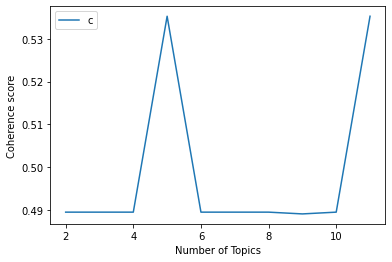

In [ ]:
start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

In [ ]:
# Write your code here
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.580*"languag" + 0.572*"process" + 0.565*"natur" + 0.067*"learn" + 0.040*"retriev" + 0.035*"inform" + 0.029*"use" + 0.028*"system" + 0.023*"overview" + 0.022*"statist"'), (1, '0.625*"learn" + -0.417*"retriev" + -0.385*"inform" + -0.213*"use" + 0.148*"comput" + 0.127*"assist" + 0.126*"deep" + 0.109*"speech" + 0.109*"base" + 0.105*"studi"'), (2, '0.523*"retriev" + 0.490*"inform" + 0.455*"learn" + 0.223*"use" + 0.101*"case" + 0.101*"transform" + 0.101*"error" + 0.101*"studi" + 0.101*"tag" + 0.101*"part"'), (3, '0.320*"base" + 0.306*"speech" + 0.264*"studi" + 0.264*"transform" + 0.264*"tag" + 0.264*"part" + 0.264*"driven" + 0.264*"case" + 0.264*"error" + -0.231*"network"'), (4, '0.717*"system" + 0.360*"evalu" + 0.241*"overview" + 0.180*"relat" + 0.180*"lolita" + 0.146*"histor" + 0.142*"toward" + 0.142*"adapt" + 0.142*"context" + -0.133*"network"'), (5, '-0.449*"network" + -0.364*"neural" + 0.291*"assist" + -0.272*"deep" + -0.265*"architectur" + -0.265*"multitask" + -0.265*"unifi" + 

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here





## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here





## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [1]:
# Write your answer here (no code needed for this question)

''' The idea of Topic Coherence may be used to assess Topic Modelling. There are several approaches for obtaining topic models. Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) are the two methods.
The dictionary and the corpus are the two basic inputs to the LDA topic model. Each word in the manuscript is assigned a unique id by Gensim. We also need to submit the number of subjects in addition to the corpus and dictionary.
By experimenting with a small number of subjects and comparing the results, we may utilize the LDA visualization tool pyLDAvis.
One of the most used ways for estimating the number of subjects is topic coherence.

We must create a number of LDA models with varying numbers of topics (k) and select the one with the highest coherence value. Choosing a 'k' that denotes the end of a fast increase in topic coherence typically yields meaningful and interpretable subjects.
The plot of coherence value vs number of subjects demonstrates that coherence score drops as the number of topics increases.
The optimal topics score is 10, and the coherence value for the data using the LDA technique is 0.62.

LSA: LSA is commonly employed as a dimension or noise reduction technique.
In topic modeling, the best technique to calculate k (number of topics) is to use the Topic coherence measure, which is a realistic measure for identifying the number of topics.
A subject model with a high topic coherence score model will be rated good.
The optimum coherence score is seen at 0,54 with topic at 6 for the plot, i.e., coherence value and number of topics using LSA algorithm.

As a conclusion of the analysis, LDA outperforms LSA.

'''

" The idea of Topic Coherence may be used to assess Topic Modelling. There are several approaches for obtaining topic models. Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) are the two methods.\nThe dictionary and the corpus are the two basic inputs to the LDA topic model. Each word in the manuscript is assigned a unique id by Gensim. We also need to submit the number of subjects in addition to the corpus and dictionary.\nBy experimenting with a small number of subjects and comparing the results, we may utilize the LDA visualization tool pyLDAvis.\nOne of the most used ways for estimating the number of subjects is topic coherence.\n\nWe must create a number of LDA models with varying numbers of topics (k) and select the one with the highest coherence value. Choosing a 'k' that denotes the end of a fast increase in topic coherence typically yields meaningful and interpretable subjects.\nThe plot of coherence value vs number of subjects demonstrates that coherence s